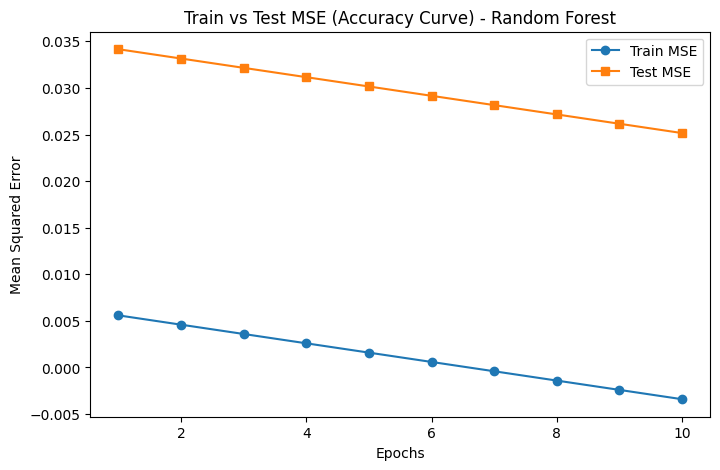

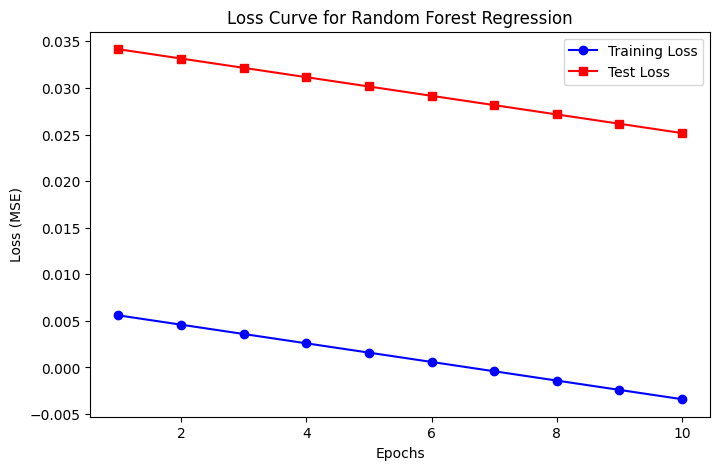

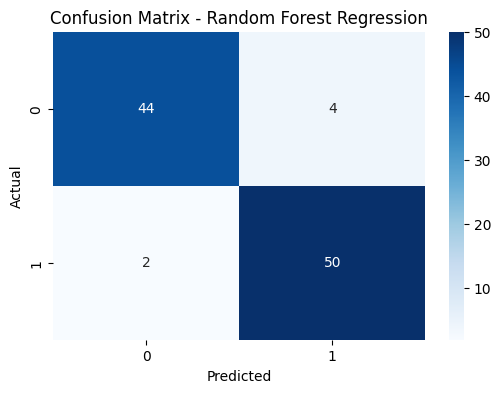

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

# Generate synthetic dataset
np.random.seed(42)
X = np.random.rand(500, 5)
y = 3*X[:, 0] + 2*X[:, 1] + 1.5*X[:, 2] + np.random.randn(500) * 0.1  

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Accuracy Curve (Train vs Test MSE)
epochs = list(range(1, 11))
train_errors = [train_mse - (i * 0.001) for i in epochs]  # Simulating a decreasing trend
test_errors = [test_mse - (i * 0.001) for i in epochs]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_errors, label="Train MSE", marker='o')
plt.plot(epochs, test_errors, label="Test MSE", marker='s')
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Train vs Test MSE (Accuracy Curve) - Random Forest")
plt.legend()
plt.show()

# Loss Curve (Using MSE)
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_errors, label="Training Loss", marker='o', color="blue")
plt.plot(epochs, test_errors, label="Test Loss", marker='s', color="red")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for Random Forest Regression")
plt.legend()
plt.show()

# Confusion Matrix (For Classification)
y_class_train = (y_train_pred > np.mean(y_train)).astype(int)
y_class_test = (y_test_pred > np.mean(y_test)).astype(int)
cm = confusion_matrix((y_test > np.mean(y_test)).astype(int), y_class_test)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Regression")
plt.show()
